In [1]:
import numpy
from matplotlib import pyplot as plt

#declare global variable
epsilon = 1.67e-21
sigma = 3.4e-10
cutoff = 3.5*sigma

In [20]:
def getRelaxedLatticeConstant():
    
    alat = [(5.0 + x/10) for x in range(0,11)]   #angstrom
    alat = 1e-10 * numpy.array(alat)   #meters
    
    energies = []
    for a in alat:
        energy = getPotentialEnergy(a)
        energies.append(energy)
    
    plt.plot(alat * (1e+10), energies, 'ro-')
    plt.xlabel('[alat (Angs)]')
    plt.ylabel('Energy (in J)')
    plt.show()
    
    index = numpy.argmin(energies)
    relaxed_alat = alat[index]
    
    
    return relaxed_alat

In [21]:
def getPotentialEnergy(alat):
    
    unitcell = getUnitcell(alat)
    
    supercell = getSupercell(unitcell)
    
    energy = float(getEnergy(unitcell, supercell))

    return energy

In [22]:
def getUnitcell(a):
    
    alat = numpy.array([[a, 0, 0], [0,a,0], [0,0,a]])
    direct = numpy.array([[0,0,0], [0.5,0.5,0.0], [0.5,0.0,0.5], [0.0,0.5,0.5]])
    cart = numpy.matmul(direct, alat)
    
    return {'direct' : direct,
            'cart' : cart,
             'alat' : alat}

In [23]:
def getSupercell(ucell):
    
    N = 1
    
    scell = getRepeatedCell(ucell, N)
    current_count = getNeighborCount(ucell, scell)
    
    while True:
        N = N + 1
        scell = getRepeatedCell(ucell, N)
        next_count = getNeighborCount(ucell, scell)
        if next_count == current_count:
            break
        current_count = next_count
     
    N = N-1
    scell = getRepeatedCell(ucell, N)
    return scell

In [24]:
def getRepeatedCell(ucell, N):
    
    direct = []
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            for k in range(-N, N+1):
                ucell_corner = numpy.array([i,j,k])
                
                for direct_atom in ucell['direct']:
                    repeat_atom = direct_atom + ucell_corner
                    direct.append(repeat_atom)
     
    cart = numpy.matmul(direct, ucell['alat'])
    alat = (2*N+1) * ucell['alat']
    
    inv_alat = numpy.linalg.inv(alat)
    direct = numpy.matmul(cart, inv_alat)
    
    
    return {'alat' : alat, 'cart' : cart, 'direct' : direct}
                    

In [25]:
def getNeighborCount(ucell, scell):
    
    uatoms_cart = ucell['cart']
    satoms_cart = scell['cart']
    
    count = 0
    for uatom in uatoms_cart:
        for satom in satoms_cart:
            
            dist = numpy.sqrt(numpy.sum((uatom - satom)**2))
            
            if dist < cutoff:
                count = count + 1
                
    return count            

In [26]:
def getEnergy(ucell, scell):
    
    potential_energy = 0.0
    uatoms_cart = ucell['cart']
    satoms_cart = scell['cart']
    
    for uatom in uatoms_cart:
        for satom in satoms_cart:
            
            dist = numpy.sqrt(numpy.sum((uatom - satom)**2))
            if dist < 1e-15:
                continue
                
            correction = 1.0    
            if atomInUnitcell(satom, ucell):
                correction = 0.5
                
            energy = correction*4*epsilon*((sigma/dist)**12 - (sigma/dist)**6)
            potential_energy = potential_energy + energy
    
    
    return potential_energy

In [27]:
def atomInUnitcell(satom, ucell):
    
    uatoms_cart = ucell['cart']
    for uatom in uatoms_cart:
        dist = numpy.sqrt(numpy.sum((uatom - satom)**2))
        if dist < 1e-15:
            return True
        
    return False

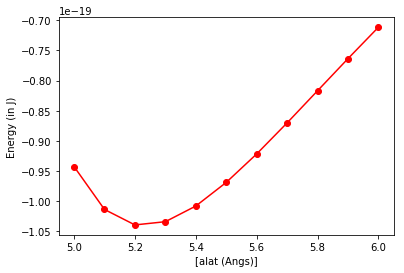

5.200000000000001e-10

In [28]:
getRelaxedLatticeConstant()